Imports

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
import matplotlib.pyplot as plt
from tensorflow_addons.metrics import RSquare
warnings.filterwarnings("ignore")
# Set Pandas to display all columsn
pd.set_option("display.max.columns", None)

In [3]:
dataset = pd.read_csv('data_preprocessing/yield_df.csv', encoding='utf-8', index_col=[0])

In [3]:
# Handle categorical variables
# OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# fit and transform the categorical data in Area and Item
encoded_data = encoder.fit_transform(dataset[['Item', 'Area']])

# convert the encoded data back into a Pandas DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Item', 'Area']))
df = pd.concat([dataset, encoded_df], axis=1)

In [4]:
# Turn yield into logaritmic
df['Log_Yield'] = np.log(df['hg/ha_yield'])

In [ ]:
# Create features and labels (and remove categorical variables)
X = df.drop(['hg/ha_yield','Log_Yield','Item','Area', 'Year'], axis=1)
y = df['Log_Yield']

In [7]:
# Create training (75%) and test (25%) sets
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size =0.2, random_state=42)

print(f'Train: {len(X_train)} features, {len(y_train)} labels\
      \nTest: {len(X_test)} features, {len(y_test)} labels')

Train: 22593 features, 22593 labels      
Test: 5649 features, 5649 labels


In [8]:
X_train.shape

(22593, 114)

In [31]:
# Define the model architecture
model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(114,)),
    # Hidden layers
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(units=1, activation=None)
])

# Compile the model
model.compile(optimizer='adam',
              loss=['mean_squared_error',],
              metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', RSquare()]
              )
# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                3680      
                                                                 
 dense_29 (Dense)            (None, 64)                2112      
                                                                 
 dense_30 (Dense)            (None, 128)               8320      
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 24,481
Trainable params: 24,481
Non-trai

In [60]:
# Train the model and store the history object
history = model.fit(X_train, y_train, epochs=90, validation_split=0.2)

Epoch 1/90
565/565 [==============================] - 1s 2ms/step - loss: 0.3206 - mean_squared_error: 0.3206 - mean_absolute_error: 0.4145 - mean_absolute_percentage_error: 3.9497 - r_square: 0.7381 - val_loss: 0.2732 - val_mean_squared_error: 0.2732 - val_mean_absolute_error: 0.4013 - val_mean_absolute_percentage_error: 3.8881 - val_r_square: 0.7829
Epoch 2/90
565/565 [==============================] - 1s 2ms/step - loss: 0.2315 - mean_squared_error: 0.2315 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 3.4956 - r_square: 0.8109 - val_loss: 0.2249 - val_mean_squared_error: 0.2249 - val_mean_absolute_error: 0.3685 - val_mean_absolute_percentage_error: 3.5021 - val_r_square: 0.8213
Epoch 3/90
565/565 [==============================] - 1s 2ms/step - loss: 0.2152 - mean_squared_error: 0.2152 - mean_absolute_error: 0.3551 - mean_absolute_percentage_error: 3.3993 - r_square: 0.8242 - val_loss: 0.2032 - val_mean_squared_error: 0.2032 - val_mean_absolute_error: 0.3373 - val_

In [61]:
metrics = model.evaluate(X_test,  y_test, verbose=2)

177/177 - 0s - loss: 0.2419 - mean_squared_error: 0.2419 - mean_absolute_error: 0.3799 - mean_absolute_percentage_error: 3.5611 - r_square: 0.8026 - 241ms/epoch - 1ms/step


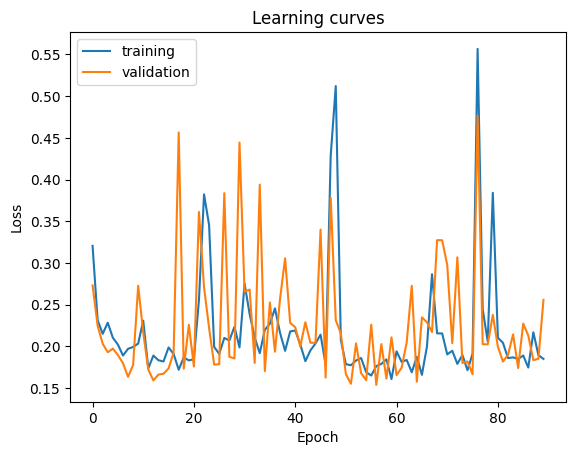

In [62]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], 'o-', color="r",
            label="Train")
plt.plot(history.history['val_loss'], 'o-', color="g",
            label="Val")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()